In [45]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error



In [36]:
with open('../datasets/housesaleprediction/kc_house_data.csv') as infile:
    data = pd.read_csv(infile)
    
data.drop(['id', 'date', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1, inplace=True)

In [37]:
data.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987


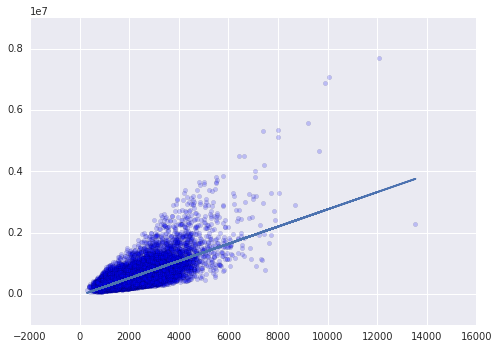

In [39]:
x = data['sqft_living'].values.reshape((len(data), 1))
y = data['price'].values.reshape((len(data), 1))

simple_model = LinearRegression()
simple_model.fit(x, y)
pred = simple_model.predict(x)

plt.scatter(x, y, alpha=0.2)
plt.plot(x, pred)
plt.show()

# En variabel

In [126]:
x = data['sqft_living'].values.reshape(-1, 1)

y = data['price'].values.reshape(-1, 1)

np.random.seed(100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

model_all = LinearRegression()
model_all.fit(x_train, y_train)

y_pred = model_all.predict(x_test)

print(mean_squared_error(y_test, y_pred))

65286065304.2


In [128]:
print(x.shape)
print(y.shape)

(21613, 1)
(21613, 1)


# De fleste variablene

In [117]:
x = data.drop(['price', 'sqft_above','sqft_basement'], axis=1)
y = data['price']

np.random.seed(100)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)


model_all = LinearRegression()
model_all.fit(x_train, y_train)

y_pred = model_all.predict(x_test)

print(mean_squared_error(y_test, y_pred))

46750071098.4
